In [1]:
import pandas as pd
import requests
import geopandas
from geodatasets import get_path

In [2]:
#Importo de forma local la API key para utilizar la API de Google Maps
from api_key.api_google_maps import google_maps_key

In [3]:
LifeExpectancy = pd.read_csv('raw/LifeExpectancy.csv')
LifeExpectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
print(f'Max Year: {LifeExpectancy['Year'].max()}')

Max Year: 2015


In [5]:
LifeExpectancy = LifeExpectancy[LifeExpectancy['Year'] == 2015]
LifeExpectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2864,Viet Nam,2015,Developing,76.0,127,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2880,Yemen,2015,Developing,65.7,224,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2896,Zambia,2015,Developing,61.8,33,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [6]:
LifeExpectancy = LifeExpectancy[['Country', 'Life expectancy', 'Population']]
LifeExpectancy

,Country,Life expectancy,Population
0,Afghanistan,65.0,33736494.0
16,Albania,77.8,28873.0
32,Algeria,75.6,39871528.0
48,Angola,52.4,2785935.0
64,Antigua and Barbuda,76.4,NaN
...,...,...,...
2848,Venezuela (Bolivarian Republic of),74.1,NaN
2864,Viet Nam,76.0,NaN
2880,Yemen,65.7,NaN
2896,Zambia,61.8,161587.0


In [7]:
country_lat = {}
country_lon = {}

In [8]:
def get_latitude(country):
    if country in country_lat:
        return country_lat[country]
    else:
        url = f'https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={google_maps_key}'
        response = requests.get(url)
        response_lat = response.json()["results"][0]["geometry"]["location"]["lat"]
        country_lat[country] = response_lat
        return response_lat

In [9]:
def get_longitude(country):
    if country in country_lon:
        return country_lon[country]
    else:
        url = f'https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={google_maps_key}'
        response = requests.get(url)
        response_lon = response.json()["results"][0]["geometry"]["location"]["lng"]
        country_lon[country] = response_lon
        return response_lon

In [10]:
LifeExpectancy['latitude'] = LifeExpectancy['Country'].apply(get_latitude)

C:\Users\ITMaker\AppData\Local\Temp\ipykernel_18508\1913155206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LifeExpectancy['latitude'] = LifeExpectancy['Country'].apply(get_latitude)


In [11]:
LifeExpectancy['longitude'] = LifeExpectancy['Country'].apply(get_longitude)

C:\Users\ITMaker\AppData\Local\Temp\ipykernel_18508\2134127753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LifeExpectancy['longitude'] = LifeExpectancy['Country'].apply(get_longitude)


In [12]:
LifeExpectancy

,Country,Life expectancy,Population,latitude,longitude
0,Afghanistan,65.0,33736494.0,33.939110,67.709953
16,Albania,77.8,28873.0,41.153332,20.168331
32,Algeria,75.6,39871528.0,28.033886,1.659626
48,Angola,52.4,2785935.0,-11.202692,17.873887
64,Antigua and Barbuda,76.4,NaN,17.060816,-61.796428
...,...,...,...,...,...
2848,Venezuela (Bolivarian Republic of),74.1,NaN,6.423750,-66.589730
2864,Viet Nam,76.0,NaN,14.058324,108.277199
2880,Yemen,65.7,NaN,15.552727,48.516388
2896,Zambia,61.8,161587.0,-13.133897,27.849332


In [24]:
GeoLifeExpectancy = geopandas.GeoDataFrame(
    LifeExpectancy, geometry=geopandas.points_from_xy(LifeExpectancy.longitude, LifeExpectancy.latitude, crs=4326)
)

In [25]:
GeoLifeExpectancy

,Country,Life expectancy,Population,latitude,longitude,geometry
0,Afghanistan,65.0,33736494.0,33.939110,67.709953,POINT (67.70995 33.93911)
16,Albania,77.8,28873.0,41.153332,20.168331,POINT (20.16833 41.15333)
32,Algeria,75.6,39871528.0,28.033886,1.659626,POINT (1.65963 28.03389)
48,Angola,52.4,2785935.0,-11.202692,17.873887,POINT (17.87389 -11.20269)
64,Antigua and Barbuda,76.4,NaN,17.060816,-61.796428,POINT (-61.79643 17.06082)
...,...,...,...,...,...,...
2848,Venezuela (Bolivarian Republic of),74.1,NaN,6.423750,-66.589730,POINT (-66.58973 6.42375)
2864,Viet Nam,76.0,NaN,14.058324,108.277199,POINT (108.2772 14.05832)
2880,Yemen,65.7,NaN,15.552727,48.516388,POINT (48.51639 15.55273)
2896,Zambia,61.8,161587.0,-13.133897,27.849332,POINT (27.84933 -13.1339)


<Axes: >

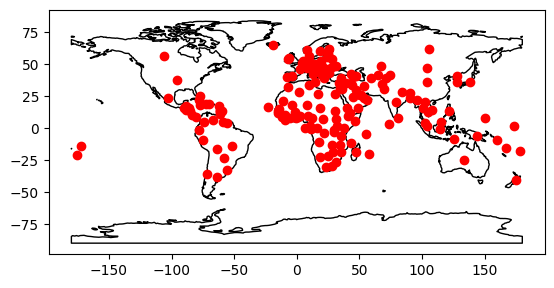

In [27]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color="white", edgecolor="black")

GeoLifeExpectancy.plot(ax=ax, color="red")

In [48]:
GeoLifeExpectancy.explore("Life expectancy", style_kwds={"style_function":lambda x: {"weight":x["properties"]["Life expectancy"]*0.2}})